In [1]:
import pandas as pd

In [3]:
!git clone https://github.com/ultralytics/yolov5  # clone
%cd yolov5
%pip install -qr requirements.txt comet_ml  # install

import torch
import utils
display = utils.notebook_init()  # checks

YOLOv5 🚀 v7.0-186-g0acc5cf Python-3.10.12 torch-2.0.1+cu118 CPU


Setup complete ✅ (2 CPUs, 12.7 GB RAM, 24.2/225.8 GB disk)


In [4]:
%pip install ultralytics
import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.122 🚀 Python-3.10.12 torch-2.0.1+cu118 CPU
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 24.2/225.8 GB disk)


In [5]:
import os
import cv2
import time
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import precision_recall_curve

In [ ]:
!python detect.py --weights ../drive/MyDrive/yolo_weights/yolov5s.pt --img 640 --conf 0.25 --source ../drive/MyDrive/guns_dataset/test/images/ --save-txt

In [ ]:
!python detect.py --weights ../drive/MyDrive/yolo_weights/yolov5m.pt --img 640 --conf 0.25 --source ../drive/MyDrive/guns_dataset/test/images/ --save-txt

In [ ]:
!python detect.py --weights ../drive/MyDrive/yolo_weights/yolov5l.pt --img 640 --conf 0.25 --source ../drive/MyDrive/guns_dataset/test/images/ --save-txt

In [ ]:
!yolo predict model='../drive/MyDrive/yolo_weights/yolov8s.pt' source='../drive/MyDrive/guns_dataset/test/images/' save_txt=True

In [ ]:
!yolo predict model='../drive/MyDrive/yolo_weights/yolov8m.pt' source='../drive/MyDrive/guns_dataset/test/images/' save_txt=True

In [ ]:
!yolo predict model='../drive/MyDrive/yolo_weights/yolov8l.pt' source='../drive/MyDrive/guns_dataset/test/images/' save_txt=True

In [28]:
import numpy as np
from sklearn.metrics import precision_score, recall_score, f1_score
from glob import glob
import os

# function to calculate Intersection over Union
def bb_intersection_over_union(boxA, boxB):
    # determine the (x, y)-coordinates of the intersection rectangle
    xA = max(boxA[0], boxB[0])
    yA = max(boxA[1], boxB[1])
    xB = min(boxA[2], boxB[2])
    yB = min(boxA[3], boxB[3])
    # compute the area of intersection rectangle
    interArea = max(0, xB - xA) * max(0, yB - yA)
    # compute the area of both the prediction and ground-truth rectangles
    boxAArea = (boxA[2] - boxA[0]) * (boxA[3] - boxA[1])
    boxBArea = (boxB[2] - boxB[0]) * (boxB[3] - boxB[1])
    # compute the intersection over union by taking the intersection area and dividing it by the sum of prediction + ground-truth areas - the intersection area
    iou = interArea / float(boxAArea + boxBArea - interArea) if (boxAArea + boxBArea - interArea) != 0 else 0
    # return the intersection over union value
    return iou

# function to calculate metrics
def calculate_metrics(original_path, predicted_path):
    original_files = glob(os.path.join(original_path, "*.txt"))
    predicted_files = glob(os.path.join(predicted_path, "*.txt"))

    y_true = []
    y_pred = []
    ious = []

    for original_file in original_files:
        filename = os.path.basename(original_file)
        predicted_file = os.path.join(predicted_path, filename)

        if os.path.exists(predicted_file):
            with open(original_file, "r") as f:
                original_boxes = np.array([list(map(float, box.split())) for box in f.readlines() if box.strip()])

            with open(predicted_file, "r") as f:
                predicted_boxes = np.array([list(map(float, box.split())) for box in f.readlines() if box.strip()])

            if len(original_boxes) > 0 and len(predicted_boxes) > 0:
                for original_box in original_boxes:
                    best_iou = 0
                    best_predicted_box = None
                    for predicted_box in predicted_boxes:
                        iou = bb_intersection_over_union(original_box[1:], predicted_box[1:])
                        if iou > best_iou:
                            best_iou = iou
                            best_predicted_box = predicted_box

                    if best_predicted_box is not None:
                        y_true.append(original_box[0])
                        y_pred.append(best_predicted_box[0])
                        ious.append(best_iou)

    if len(y_true) > 0 and len(y_pred) > 0:
        precision = precision_score(y_true, y_pred)
        recall = recall_score(y_true, y_pred)
        f1 = f1_score(y_true, y_pred)
        mean_iou = np.mean(ious)
        return precision, recall, f1, mean_iou
    else:
        return None, None, None, None

original_labels = "../drive/MyDrive/guns_dataset/test/labels"
model_paths = {
    'yolov5s': "runs/detect/exp7/labels",
    'yolov5m': "runs/detect/exp8/labels",
    'yolov5l': "runs/detect/exp9/labels",
    'yolov8s': "runs/detect/predict4/labels",
    'yolov8m': "runs/detect/predict5/labels",
    'yolov8l': "runs/detect/predict6/labels"
}

# calculate metrics for each model
for model, path in model_paths.items():
    precision, recall, f1, mean_iou = calculate_metrics(original_labels, path)
    if precision is not None:
        print(f'Metrics for {model}:')
        print(f'Precision: {precision}')
        print(f'Recall: {recall}')
        print(f'F1-Score: {f1}')
        print(f'Mean IoU: {mean_iou}\n')
    else:
        print(f'No detections for {model}')


Metrics for yolov5s:
Precision: 0.7
Recall: 0.5833333333333334
F1-Score: 0.6363636363636365
Mean IoU: 0.4634777703755259

Metrics for yolov5m:
Precision: 0.84
Recall: 0.7
F1-Score: 0.7636363636363636
Mean IoU: 0.4750765074676375

Metrics for yolov5l:
Precision: 0.7777777777777778
Recall: 0.5384615384615384
F1-Score: 0.6363636363636364
Mean IoU: 0.4174053931381022

Metrics for yolov8s:
Precision: 0.7391304347826086
Recall: 0.5666666666666667
F1-Score: 0.6415094339622641
Mean IoU: 0.44347930563871024

Metrics for yolov8m:
Precision: 0.8571428571428571
Recall: 0.5454545454545454
F1-Score: 0.6666666666666665
Mean IoU: 0.43813508262587286

Metrics for yolov8l:
Precision: 1.0
Recall: 0.6774193548387096
F1-Score: 0.8076923076923077
Mean IoU: 0.42153099459431687



In [ ]:
import os
import time
import cv2
import torch
from glob import glob
from ultralytics import YOLO

def get_inference_time(model, img_path, device):
    img = cv2.imread(str(img_path))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img_tensor = torch.from_numpy(img).permute(2,0,1).float().div(255.0).unsqueeze(0).to(device)

    start_time = time.time()
    results = model(img_tensor)
    end_time = time.time()
    inference_time = end_time - start_time
    return inference_time

models_paths = {
    'yolov5s': "../drive/MyDrive/yolo_weights/yolov5s.pt",
    'yolov5m': "../drive/MyDrive/yolo_weights/yolov5m.pt",
    'yolov5l': "../drive/MyDrive/yolo_weights/yolov5l.pt",
    'yolov8s': "../drive/MyDrive/yolo_weights/yolov8s.pt",
    'yolov8m': "../drive/MyDrive/yolo_weights/yolov8m.pt",
    'yolov8l': "../drive/MyDrive/yolo_weights/yolov8l.pt",
}

inference_times = {}
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

for model_name, model_path in models_paths.items():
    if 'yolov8' in model_name:
        model = YOLO(model_path)
    else:
        model = torch.hub.load('ultralytics/yolov5', 'custom', path=model_path, force_reload=True).to(device)

    #model.eval()

    img_list = glob('/content/drive/MyDrive/guns_dataset/test/images/*.jpg')[:10]
    total_time = 0
    for img in img_list:
        total_time += get_inference_time(model, img, device)

    average_time = total_time / len(img_list)
    inference_times[model_name] = average_time  # Change to model_name to correspond with the plotted models' names

print(inference_times)


In [2]:
df = pd.read_csv('model_metrics.csv')
df.head()

,Model,Precision,Recall,F1-Score,Mean IoU
0,yolov5s,0.700000,0.583333,0.636364,0.463478
1,yolov5m,0.840000,0.700000,0.763636,0.475077
2,yolov5l,0.777778,0.538462,0.636364,0.417405
3,yolov8s,0.739130,0.566667,0.641509,0.443479
4,yolov8m,0.857143,0.545455,0.666667,0.438135


In [67]:
f1_scores = {
    'yolov5s': 0.6363636363636365,
    'yolov5m': 0.7636363636363636,
    'yolov5l': 0.6363636363636364,
    'yolov8s': 0.6415094339622641,
    'yolov8m': 0.6666666666666665,
    'yolov8l': 0.8076923076923077,
}


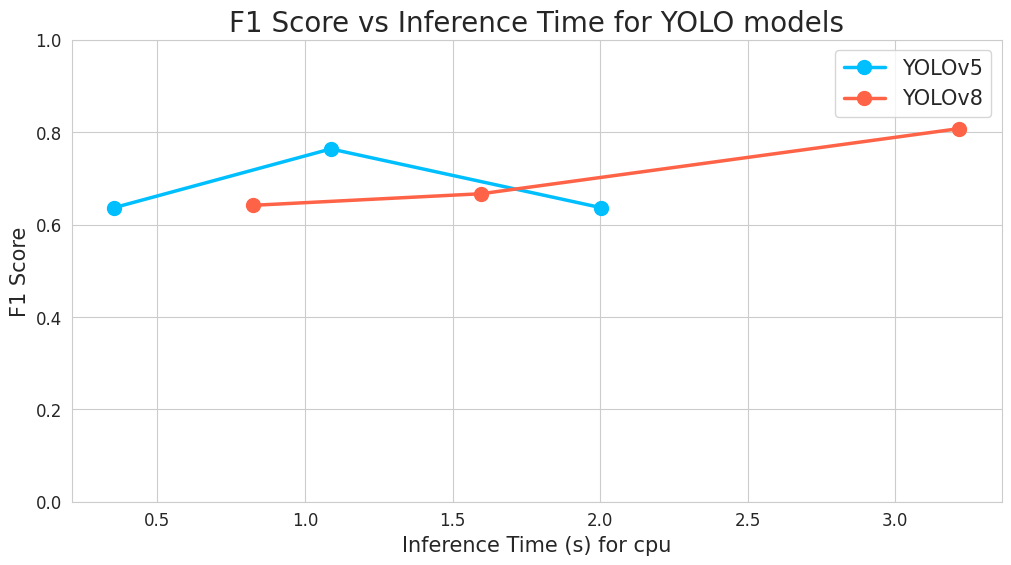

In [70]:
import matplotlib.pyplot as plt
import seaborn as sns

# Seaborn style
sns.set_style("whitegrid")

# Assuming these are your F1-scores and inference times
yolov5_models = ['yolov5s', 'yolov5m', 'yolov5l']
yolov8_models = ['yolov8s', 'yolov8m', 'yolov8l']

yolov5_times = [inference_times[model] for model in yolov5_models]
yolov5_f1s = [f1_scores[model] for model in yolov5_models]

yolov8_times = [inference_times[model] for model in yolov8_models]
yolov8_f1s = [f1_scores[model] for model in yolov8_models]

# Create a larger plot
plt.figure(figsize=(12, 6))

# Use more appealing plot lines
plt.plot(yolov5_times, yolov5_f1s, marker='o', markersize=10, linestyle='-', color='deepskyblue', linewidth=2.5, label='YOLOv5')
plt.plot(yolov8_times, yolov8_f1s, marker='o', markersize=10, linestyle='-', color='tomato', linewidth=2.5, label='YOLOv8')

# Add titles and labels with a larger font
plt.title('F1 Score vs Inference Time for YOLO models', fontsize=20)
plt.xlabel('Inference Time (s) for cpu', fontsize=15)
plt.ylabel('F1 Score', fontsize=15)

# Increase ticks size
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.ylim(0, 1)

# Add legend with bigger font
plt.legend(prop={'size': 15})

# Show grid
plt.grid(True)

plt.show()
